# Objective

* Load Data, vectorize reviews to numbers
* Build a basic model based on counting
* Evaluate the Model
* Make a first Kaggle Submission

## Download Data from Kaggle:

* Competition Link: https://www.kaggle.com/c/movie-sentiment-analysis
        
* Unzip into Data Directory

In [1]:
from __future__ import print_function  # Python 2/3 compatibility
import numpy as np
import pandas as pd
from collections import Counter

from IPython.display import Image

## Load Data

In [2]:
train_df = pd.read_csv("data/train.tsv", sep="\t")

In [3]:
train_df.sample(10)

,document_id,sentiment,review
1436,1436,1,I was also on hand for the premiere in Toronto...
4652,4652,1,The part of The Grinch was made for Jim Carrey...
20582,20582,1,"A great film this, and a shame that it will re..."
16414,16414,1,"I had few problems with this film, and I have ..."
9607,9607,1,"As I am no fan of almost any post-""Desperate L..."
17504,17504,0,"Straight to the point: ""The Groove Tube"" is on..."
19799,19799,1,EARTH (2009) ***1/2 Big screen adaptation of t...
7793,7793,0,"Made one year before ILSA, SHE-WOLF OF THE SS,..."
24956,24956,0,"This is the worst, and I mean THE worst comput..."
20321,20321,0,Just saw this film and I must say that althoug...


In [4]:
# Load the Test Dataset
# Note that it's missing the Sentiment Column.  That's what we need to Predict
#
test_df = pd.read_csv("data/test.tsv", sep="\t")
test_df.head()

,document_id,review
0,0,This is one of those movies that has everythin...
1,1,I don't know what some people were thinking wh...
2,2,Here is a rundown of a typical Rachael Ray Sho...
3,3,"""Speck"" was apparently intended to be a biopic..."
4,4,Let's get it clear from the start: I am an ass...


## Explore Dataset

In [5]:
# Equal Number of Positive and Negative Sentiments
train_df.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [6]:
# Lets take a look at some examples
def print_reviews(reviews, max_words=500):
    for review in reviews:
        print(review[:500], end="\n\n")

In [7]:
# Some Positive Reviews
print("Sample **Positive** Reviews: ", "\n")
print_reviews(train_df[train_df["sentiment"] == 1].sample(3).review)

Sample **Positive** Reviews:  

I saw this movie yesterday on Turner, and I was unable to stop watching until it was over, even though I sort of could guess what would happen. Farrell was great in her role, and everyone else did a super job. Some of it seemed to stretch the limits, but all in all, I loved it!! If you get the chance to see it, please do! I actually cried at a few scenes, but then I guess if you are a mom you would. Loretta is beautiful, and I was just in astonishment at the very idea of their being unwed moms t

There are a few spoilers in this comment!!<br /><br />Contrary to the comments I just read by nativetex4u and a few others, I really liked the movie and would love to see it as a weekly series.<br /><br />I am a Judson Mills fan but also a huge Chuck Norris fan and while I'll admit that a few of the action scenes may have stretched the line a little, the storyline fit right in with other weekly series that are currently being aired.<br /><br />The opening fiftee

In [8]:
# Some Negative Reviews
print("Sample **Negative** Reviews: ", "\n")
print_reviews(train_df[train_df["sentiment"] == 0].sample(3).review)

Sample **Negative** Reviews:  

Nobody, but nobody, could chew the scenery like the Divine One, Ruth Elizabeth Davis, and "Elizabeth and Essex" is a great example why. Although she overplays the part at times, watch her when she gawfs about Raliegh writing the lyrics to a song her ladies-in-waiting are about to play: in that one moment, she makes us understand how Elizabeth was able to rule and rule absolutely! At other times, she is done in by the script's sappiness. When Elizabeth has to be vulnerable, she comes off as weak 

WHITE CHICKS Hold on, why couldn't they have dressed as Black Chicks, oh yeah, they wouldn't look different at all. Can anyone give me one Wayans movie where they haven't dressed up as ladies? Don't Be A Menace doesn't count, Jack White and Michael Costanza ghost wrote that (the other Norton Trio members acted as Directors).<br /><br />In White Chicks, there's never really any jokes. It's just the Wayans acting like girls for 2 hours. There's no setups, no punch

## Vectorize Data (a.k.a. covert text to numbers)

Computers don't understand Texts, so we need to convert texts to numbers before we could do any math on it and see if we can build a system to classify a review as Positive or Negative.

Ways to vectorize data:

* Bag of Words
* TF-IDF
* Word Embeddings (Word2Vec) 

### Bag of Words

Take each sentence and count how many occurances of a particular word.

In [9]:
## Doing it by Hand

def bag_of_words_vocab(reviews):
    """Returns words in the reviews"""
    # all_words = []
    # for review in reviews:
    #    for word in review.split():
    #       all_words.append(word)
    ## List comprehension method of the same lines above
    all_words = [word.lower() for review in reviews for word in review.split(" ")]
    return Counter(all_words)

In [10]:
words_vocab = bag_of_words_vocab(train_df.review)

In [11]:
words_vocab.most_common(20)

[('the', 322174),
 ('a', 159949),
 ('and', 158556),
 ('of', 144459),
 ('to', 133965),
 ('is', 104170),
 ('in', 90521),
 ('i', 70477),
 ('this', 69711),
 ('that', 66287),
 ('it', 65489),
 ('/><br', 50935),
 ('was', 47023),
 ('as', 45098),
 ('for', 42839),
 ('with', 42725),
 ('but', 39757),
 ('on', 31618),
 ('movie', 30883),
 ('his', 29058)]

#### Observations:

* Common words are not that meaningful (also called Stop words - unfortunately)
* These words are likely to appear in both Positive and Negative Reviews


We need a way to find what words are mroe likely to cocur in Postive Review as compared to Negative Review

In [12]:
pos_words_vocab = bag_of_words_vocab(train_df[train_df.sentiment == 1].review)
neg_words_vocab = bag_of_words_vocab(train_df[train_df.sentiment == 0].review)

In [13]:
pos_words_vocab.most_common(10)

[('the', 165794),
 ('and', 87022),
 ('a', 82054),
 ('of', 76155),
 ('to', 65868),
 ('is', 55785),
 ('in', 48419),
 ('i', 33142),
 ('it', 32794),
 ('that', 32702)]

In [14]:
neg_words_vocab.most_common(10)

[('the', 156380),
 ('a', 77895),
 ('and', 71534),
 ('of', 68304),
 ('to', 68097),
 ('is', 48385),
 ('in', 42102),
 ('i', 37335),
 ('this', 37301),
 ('that', 33585)]

In [15]:
pos_neg_freq = Counter()

for word in words_vocab:
    pos_neg_freq[word] = (pos_words_vocab[word] + 1e-3) / (neg_words_vocab[word] + 1e-3)

In [16]:
print("Neutral words:")
print("Pos-to-neg for 'the' = {:.2f}".format(pos_neg_freq["is"]))
print("Pos-to-neg for 'movie' = {:.2f}".format(pos_neg_freq["is"]))

print("\nPositive and Negative review words:")
print("Pos-to-neg for 'amazing' = {:.2f}".format(pos_neg_freq["great"]))
print("Pos-to-neg for 'terrible' = {:.2f}".format(pos_neg_freq["terrible"]))

Neutral words:
Pos-to-neg for 'the' = 1.15
Pos-to-neg for 'movie' = 1.15

Positive and Negative review words:
Pos-to-neg for 'amazing' = 2.49
Pos-to-neg for 'terrible' = 0.23


### Let's Amplify the difference using Log Scale


* Neutral Values are Close to 1
* Negative Sentiment Words are less than 1
* Positive Sentiment Words are greater than 1

When Converted to Log Scale -

* Neutral Values are Close to 0
* Negative Sentiment Words are negative
* Positive Sentiment Words are postive

That not only makes lot of sense when looking at the numbers, but we could use it for our first classifier

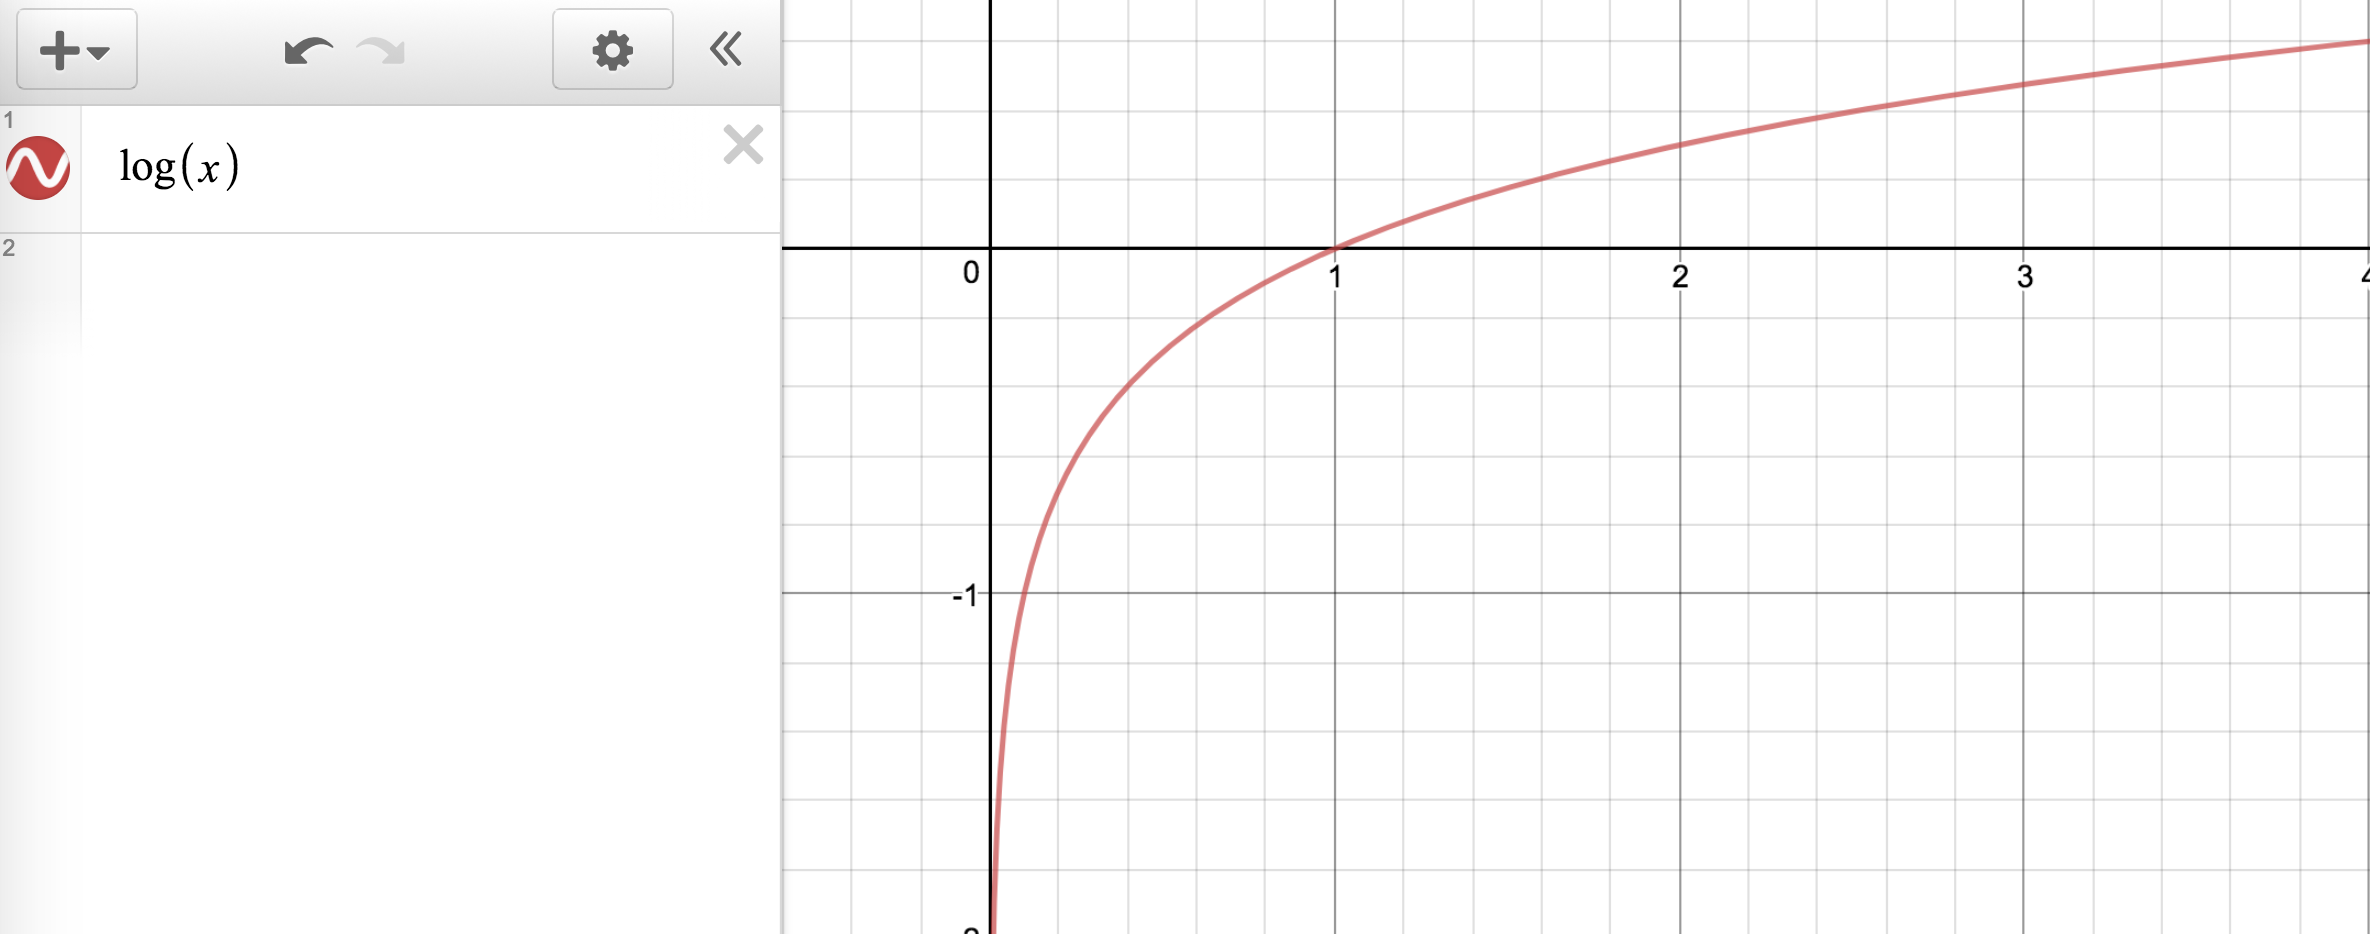

In [17]:
# https://www.desmos.com/calculator  
Image("images/log-function.png", width=960)

In [18]:
for word in pos_neg_freq:
    pos_neg_freq[word] = np.log(pos_neg_freq[word])

In [19]:
print("Neutral words:")
print("Pos-to-neg for 'the' = {:.2f}".format(pos_neg_freq["is"]))
print("Pos-to-neg for 'movie' = {:.2f}".format(pos_neg_freq["is"]))

print("\nPositive and Negative review words:")
print("Pos-to-neg for 'amazing' = {:.2f}".format(pos_neg_freq["great"]))
print("Pos-to-neg for 'terrible' = {:.2f}".format(pos_neg_freq["terrible"]))

Neutral words:
Pos-to-neg for 'the' = 0.14
Pos-to-neg for 'movie' = 0.14

Positive and Negative review words:
Pos-to-neg for 'amazing' = 0.91
Pos-to-neg for 'terrible' = -1.48


## Time to build a Counting Model

* For each Review, we will ADD all the pos_neg_freq values and if the Total for all words in the given review is > 0, we will call it Positive Review and if it's a negative total, we will call it a Negative Review.  Sounds good?

In [20]:
class CountingClassifier(object):
    
    def __init__(self, pos_neg_freq):
        self.pos_neg_freq = pos_neg_freq
    
    def fit(self, X, y=None):
        # No Machine Learing here.  It's just counting
        pass
    
    def predict(self, X):
        predictions = []
        for review in X:
            all_words = [word.lower() for word in review.split()]
            result = np.sum(self.pos_neg_freq.get(word, 0) for word in all_words)
            predictions.append(result)
        return np.array(predictions)

In [21]:
counting_model = CountingClassifier(pos_neg_freq)
train_predictions = counting_model.predict(train_df.review)

In [22]:
train_predictions[:10]

array([  38.98741208, -145.4494649 ,   79.48481629,  -60.47807639,
        -32.43004603,   23.68610892,   34.98742754,  142.10784954,
        -88.51599139,   27.37823138])

In [23]:
# Covert to Binary Classifier
train_predictions > 0

array([ True, False,  True, ..., False, False, False], dtype=bool)

In [24]:
y_pred = (train_predictions > 0).astype(int)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [25]:
y_true = train_df.sentiment
len(y_true)

25000

In [26]:
np.sum(y_pred == y_true)

24834

In [27]:
## Accuracy
train_accuracy = np.sum(y_pred == y_true) / len(y_true)

print("Accuracy on Train Data: {:.2f}".format(train_accuracy))

Accuracy on Train Data: 0.99


#### Machine Learning Easy?  What Gives?

Remember this is Training Accuracy.  We have not split our Data into Train and Validation (which we will do in our next notebook when we actualy build a Machine Learning Model)

## Make a Submission to Kaggle

Predict on Test Data and Submit to Kaggle.  May be we could end the tutorial right here :-D

In [28]:
## Test Accracy
test_predictions = counting_model.predict(test_df.review)

test_predictions

array([ 39.6158028 ,  -6.23806   , -47.61447547, ...,  17.32151435,
       -12.64347062,   8.09732377])

In [29]:
y_pred = (test_predictions > 0).astype(int)

In [30]:
df = pd.DataFrame({
    "document_id": test_df.document_id,
    "sentiment": y_pred
})

In [31]:
df.head()

,document_id,sentiment
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1


In [32]:
df.to_csv("data/count-submission.csv", index=False)

## Reasons for Testing Accuracy Being Lower?


* One Hypothesis, Since we are just Adding up ALL of the scores for each word in the review, the length of the reivew could have an impact.  Let's look at length of reviews in train and test dataset

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

/Users/sampathweb/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


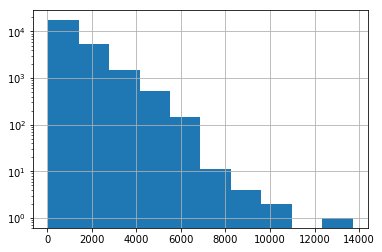

In [34]:
train_df.review.str.len().hist(log=True)

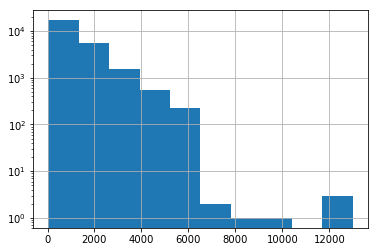

In [35]:
test_df.review.str.len().hist(log=True)

## Next Steps

* Split the Training Data into Training and Validation to avoid surprises on New Data(might not have helped in our counting method)
* Build a Machine Learning Model beyond the rule based system of Counting values